### Setup

In [6]:
import torch
from torchvision import transforms

import cv2
import numpy as np
from PIL import Image
from jupyter_compare_view import compare

from depth4mc.model.D4MCModel import D4MCModel
from depth4mc.dataset.D4MCDataset import DEFAULT_TRANSFORM
from depth4mc.dataset.dataset_maker.convert_to_dataset import to_depth_far
from depth4mc.comparing.DepthAnythingWrapper import DepthAnythingWrapper, DEPTH_ANYTHING_TRANSFORM

In [9]:
def load_D4MC(checkpoint_path='../training/results/checkpoints_12k_final/model_final.pth', device='cpu'):
    model = D4MCModel()
    model.load_state_dict(torch.load(checkpoint_path, weights_only=True))
    model = model.to(device).eval()
    return model

def load_DepthAnything(device='cpu'):
    return DepthAnythingWrapper(device, (854, 480))

In [63]:
def load_img(img_nr):
    screenshot = Image.open(f'../dataset/data/screenshots/{img_nr:08}.png').convert('RGB')

    input_D4MC = DEFAULT_TRANSFORM(screenshot).unsqueeze(0)

    input_DA = cv2.cvtColor(cv2.imread(f'../dataset/data/screenshots/{img_nr:08}.png'), cv2.COLOR_BGR2RGB) / 255.0
    input_DA = torch.from_numpy(DEPTH_ANYTHING_TRANSFORM({'image': input_DA})['image']).unsqueeze(0)

    depth_label = np.load(f'../dataset/data/depth_labels/{img_nr:08}.npy')
    depth_img = transforms.functional.to_pil_image(depth_label / to_depth_far(255))
    
    return input_D4MC, input_DA, screenshot, depth_img

In [80]:
def do_comp(model_D4MC, model_DA, img_nr=0):
    input_D4MC, input_DA, screenshot, depth_img = load_img(img_nr)
    with torch.no_grad():
        output_D4MC = model_D4MC(input_D4MC)[0]
        output_DA   = model_DA(input_DA)[0]
    output_D4MC_img = transforms.functional.to_pil_image(torch.clamp(output_D4MC, max=to_depth_far(255)) / to_depth_far(255))
    output_DA_img   = transforms.functional.to_pil_image(output_DA / output_DA.max())

    print('### Ground truth depth')
    display(compare(screenshot, depth_img, cmap="gray", start_mode="horizontal", start_slider_pos=0.75))
    
    print('### D4MC depth prediction')
    display(compare(screenshot, output_D4MC_img, cmap="gray", start_mode="horizontal", start_slider_pos=0.75))
    
    print('### DepthAnything depth prediction')
    display(compare(screenshot, output_DA_img, cmap="gray", start_mode="horizontal", start_slider_pos=0.75))
    
    print('### Ground truth vs D4MC prediction')
    display(compare(depth_img, output_D4MC_img, cmap="gray", start_mode="horizontal", start_slider_pos=0.75))
    
    print('### D4MC prediction vs DepthAnything prediction')
    display(compare(output_D4MC_img, output_DA_img, cmap="gray", start_mode="horizontal", start_slider_pos=0.75))

def analyse_random(model_D4MC, size=5):

    for img_nr in np.random.choice(range(12000), size=size):

        input_D4MC, _, screenshot, _ = load_img(img_nr)
        with torch.no_grad():
            output_D4MC = model_D4MC(input_D4MC)[0]
        output_D4MC_img = transforms.functional.to_pil_image(torch.clamp(output_D4MC, max=to_depth_far(255)) / to_depth_far(255))

        print(f'### D4MC depth prediction for {img_nr=}')
        display(compare(screenshot, output_D4MC_img, cmap="gray", start_mode="horizontal", start_slider_pos=0.75))

In [24]:
model_D4MC = load_D4MC()
model_DepthAnything = load_DepthAnything()

### Compare

### Ground truth depth



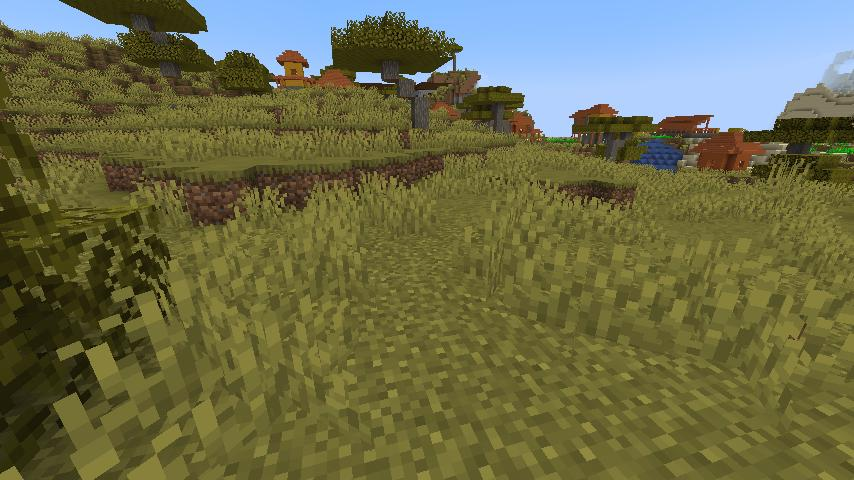
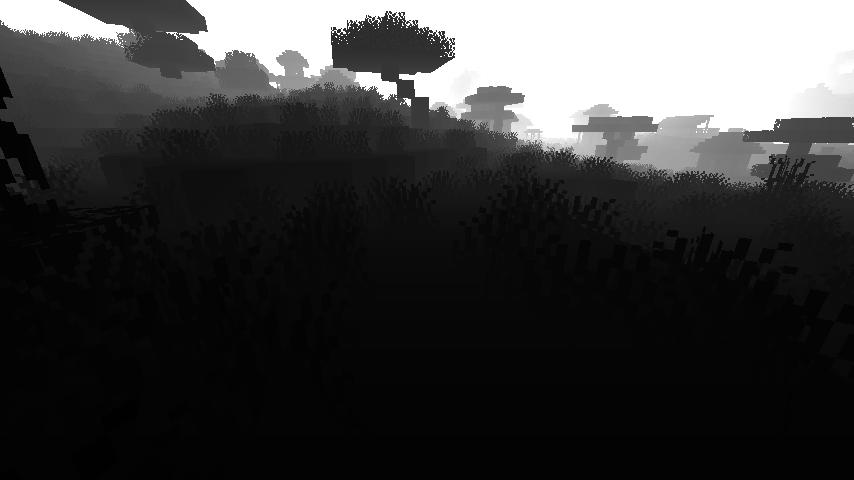

### D4MC depth prediction



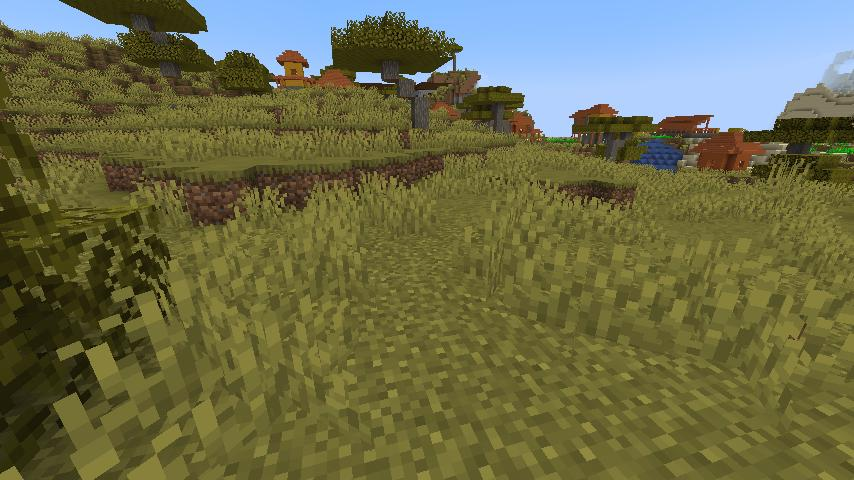
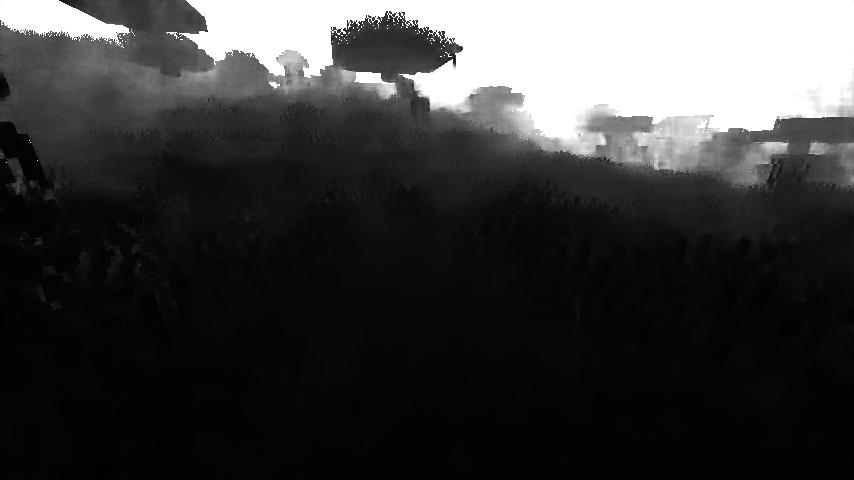

### DepthAnything depth prediction



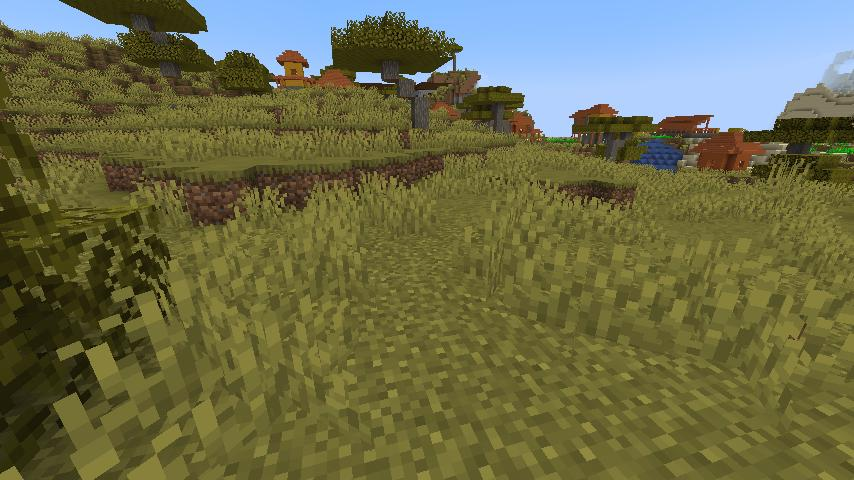
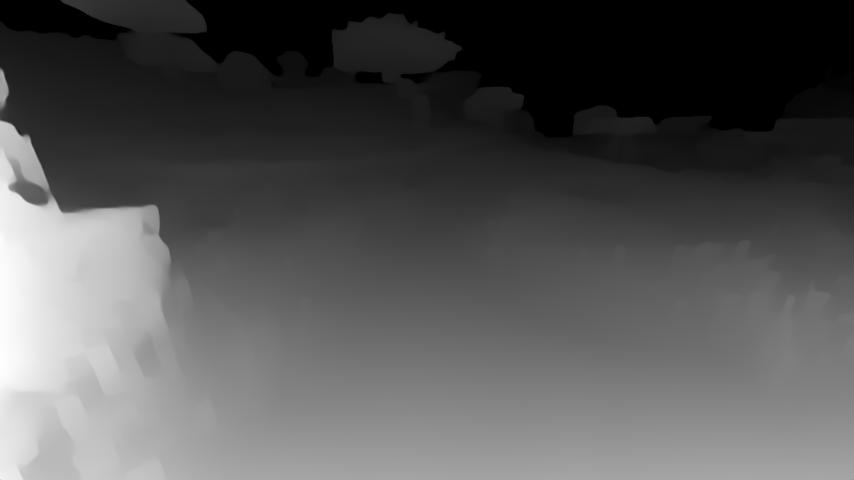

### Ground truth vs D4MC prediction



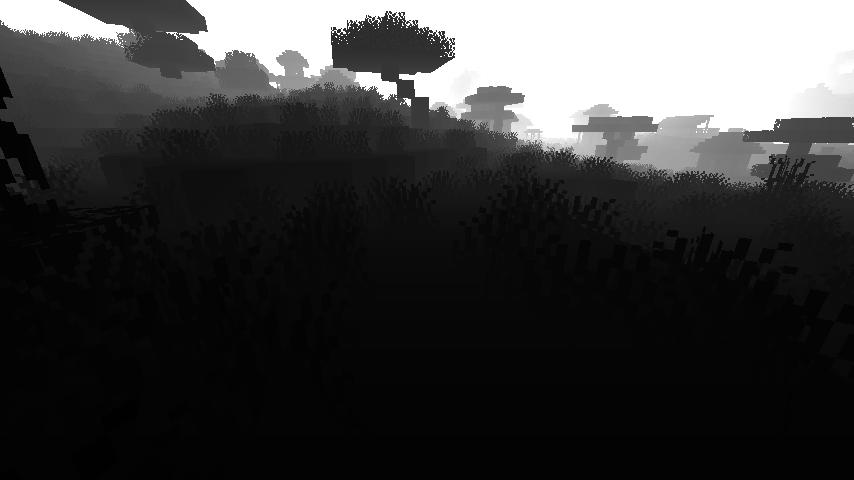
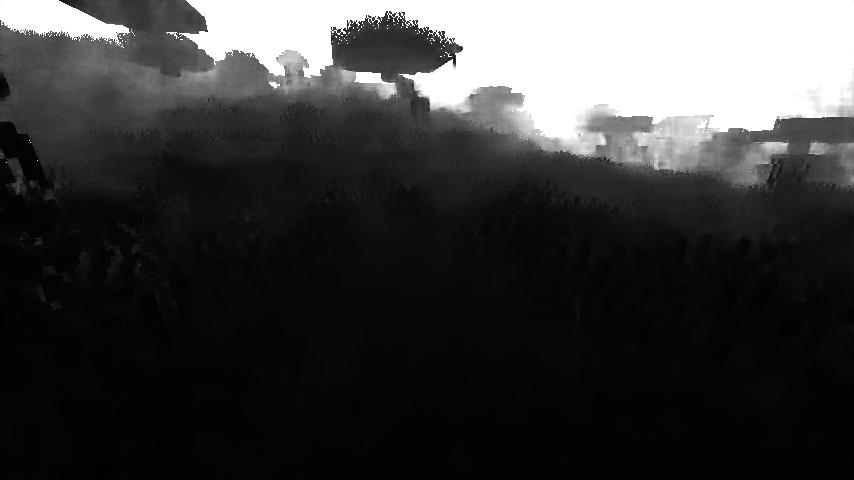

### D4MC prediction vs DepthAnything prediction



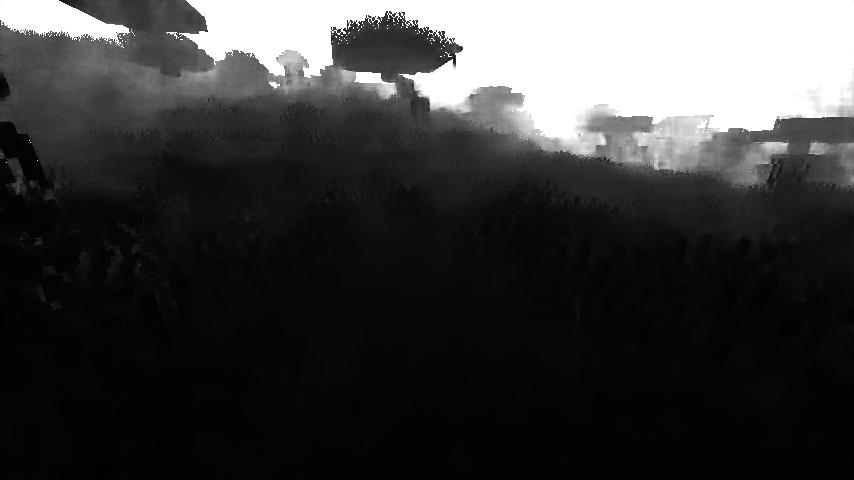
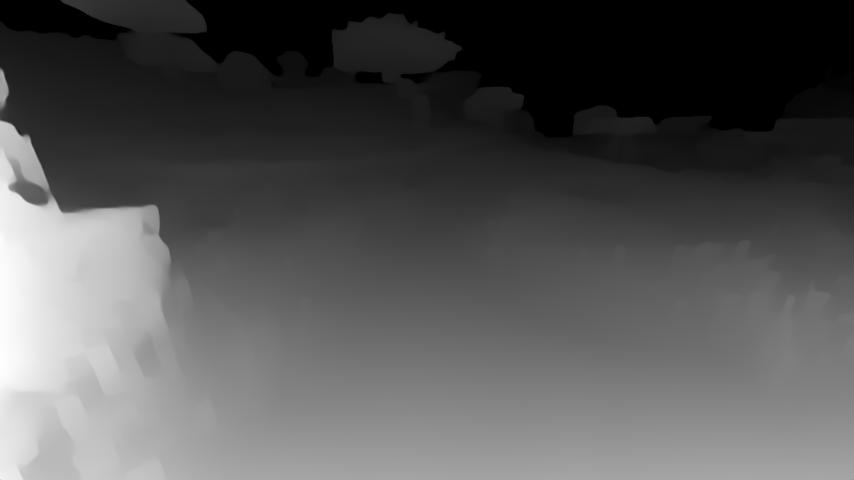

In [78]:
do_comp(model_D4MC, model_DepthAnything, img_nr=100)

### D4MC depth prediction for img_nr=7643



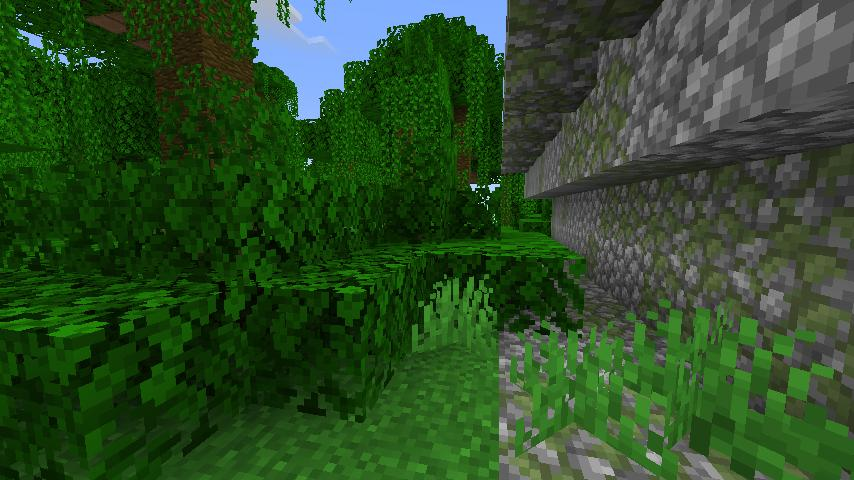
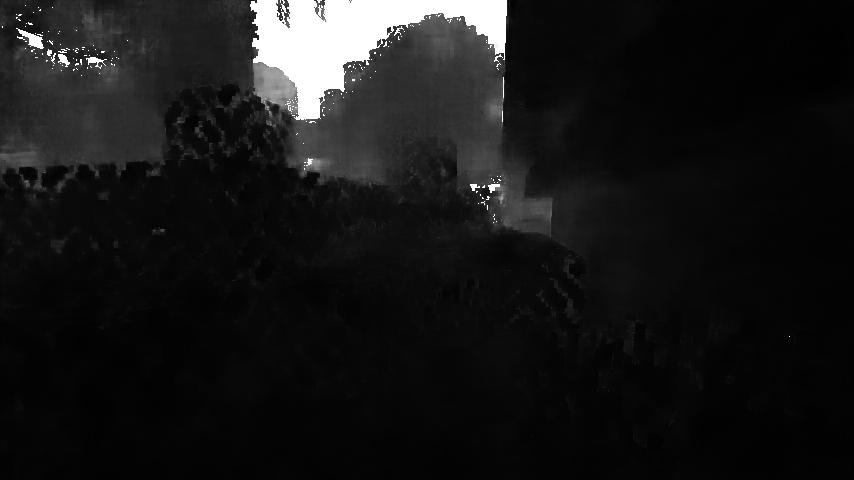

### D4MC depth prediction for img_nr=3775



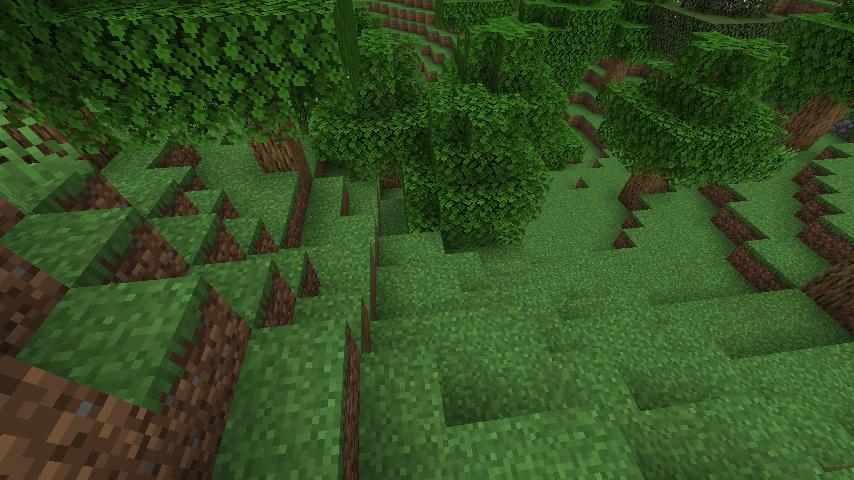
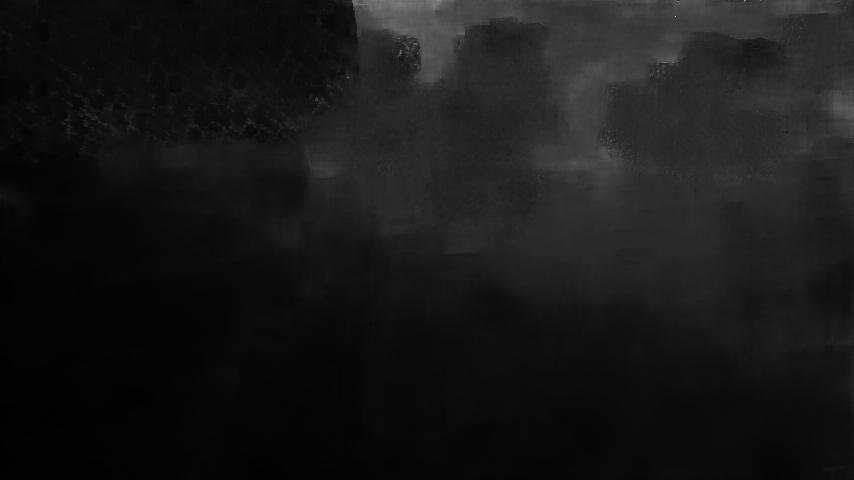

### D4MC depth prediction for img_nr=247



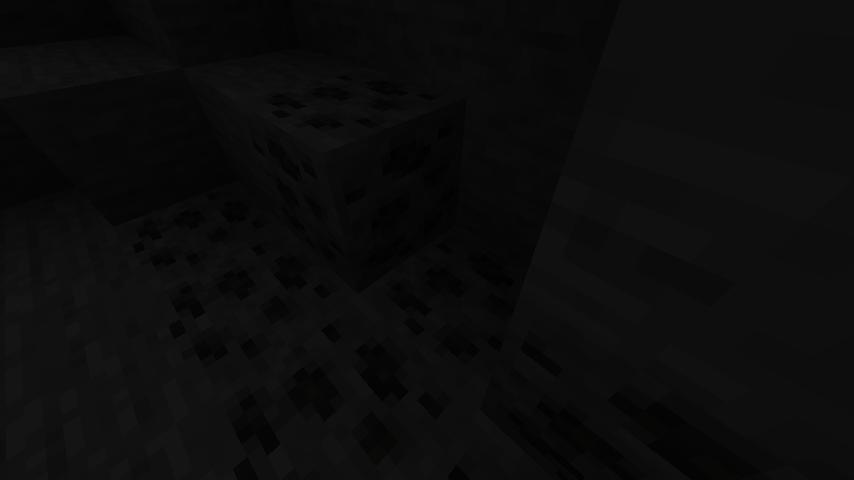
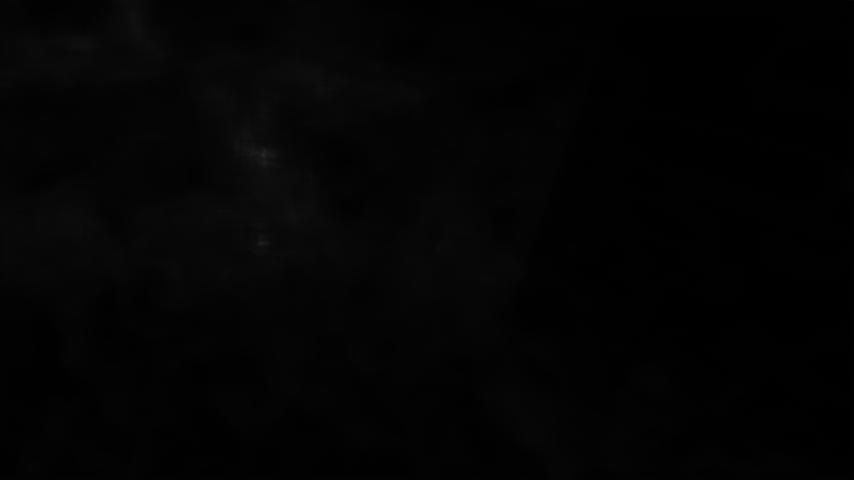

### D4MC depth prediction for img_nr=11178



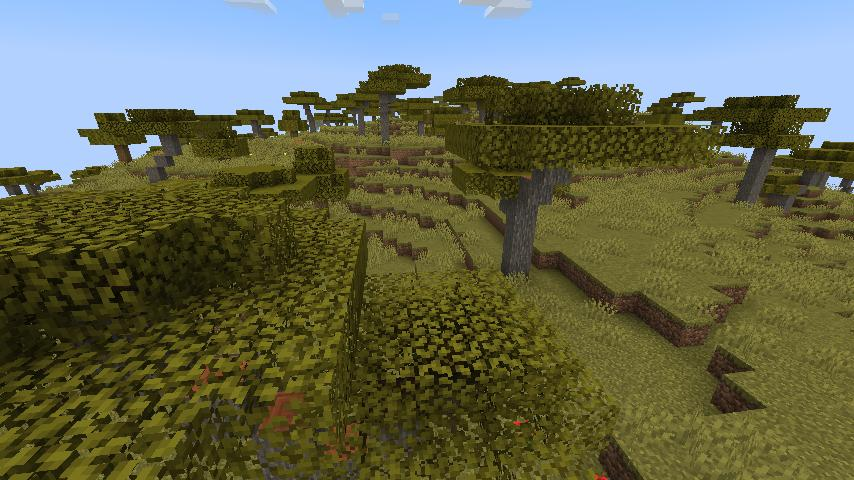
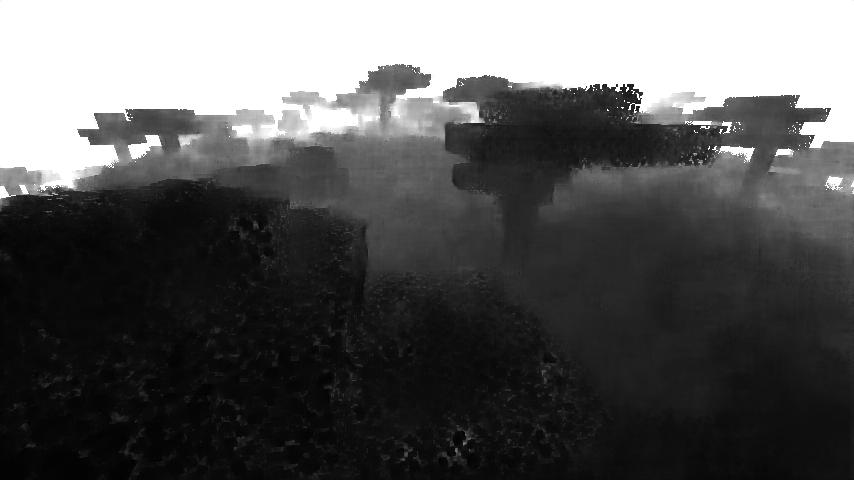

### D4MC depth prediction for img_nr=5806



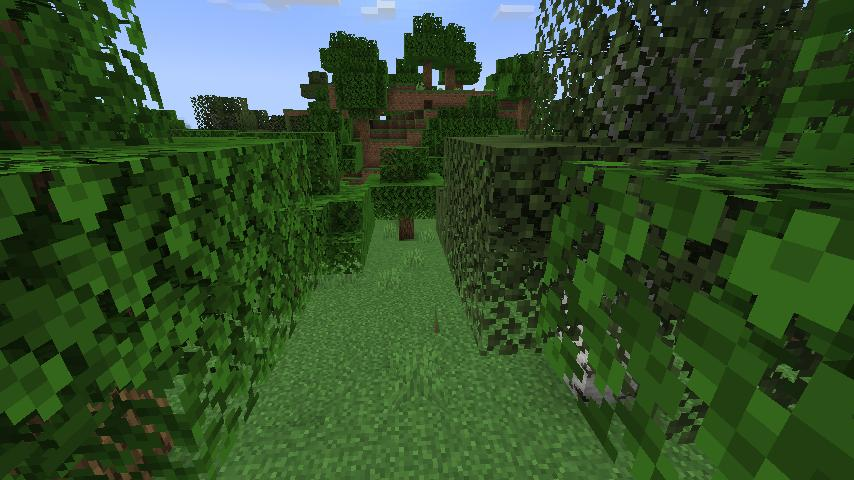
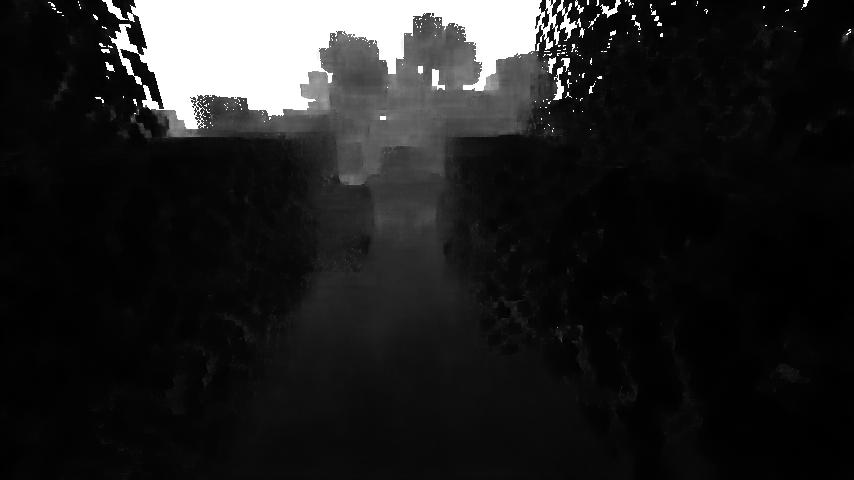

In [87]:
analyse_random(model_D4MC)

### Ground truth depth



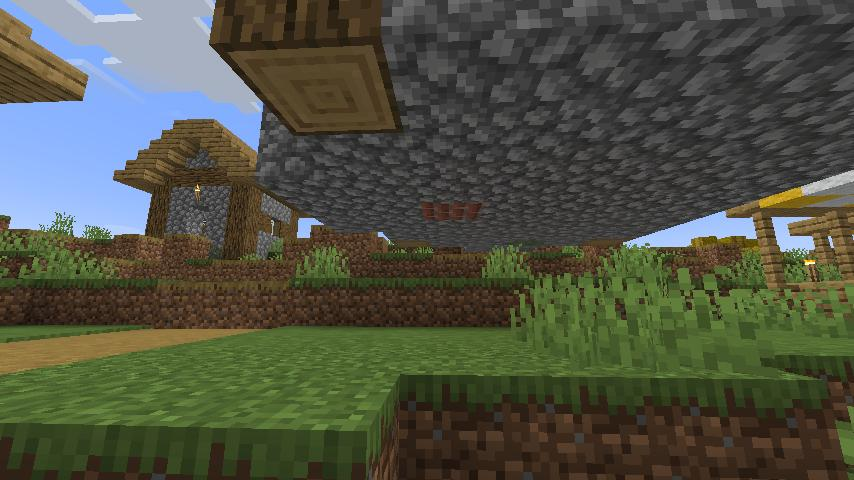
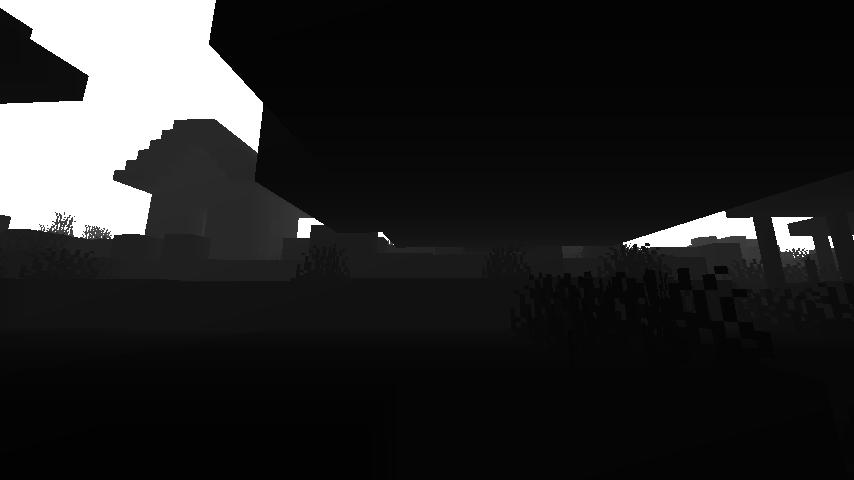

### D4MC depth prediction



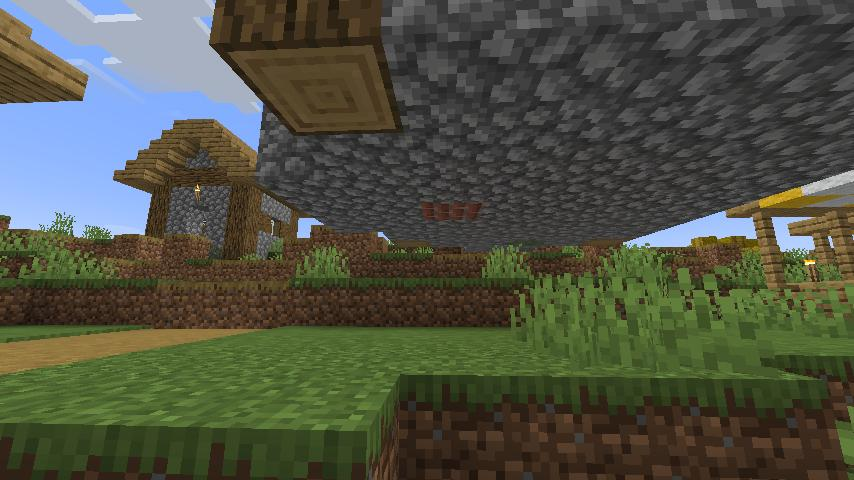
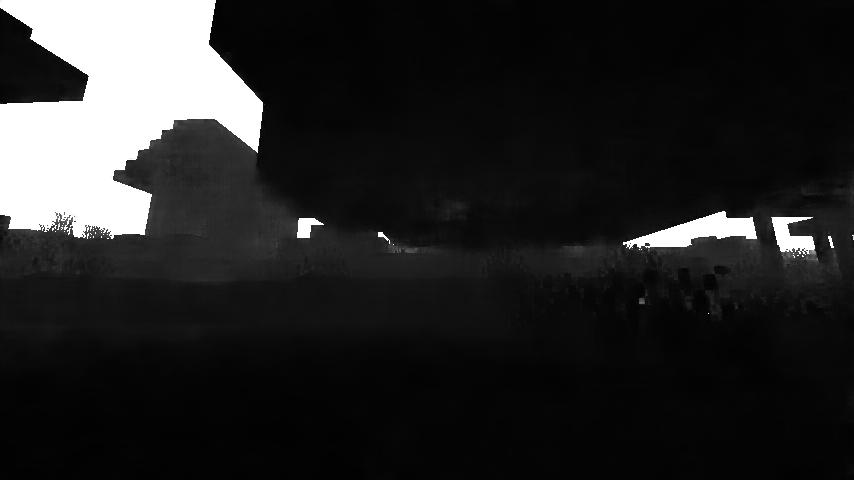

### DepthAnything depth prediction



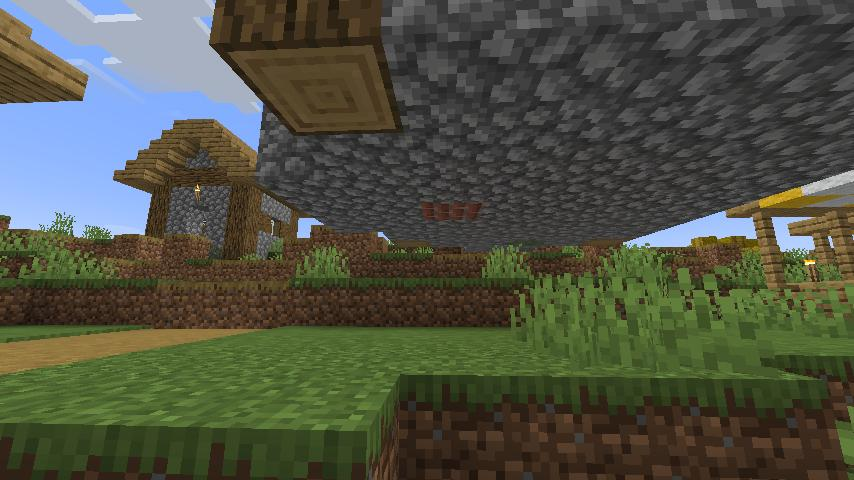
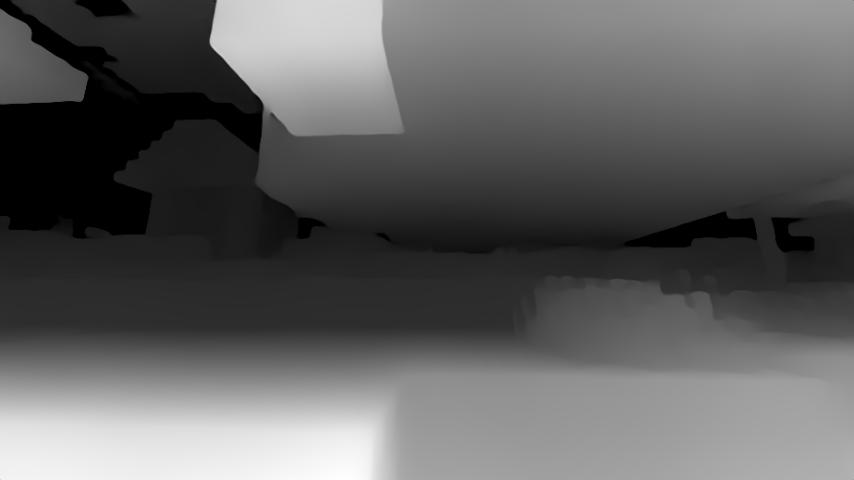

### Ground truth vs D4MC prediction



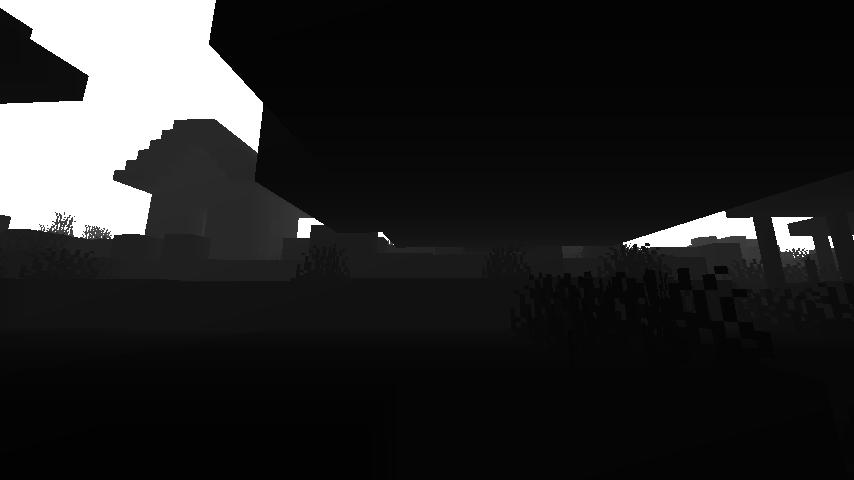
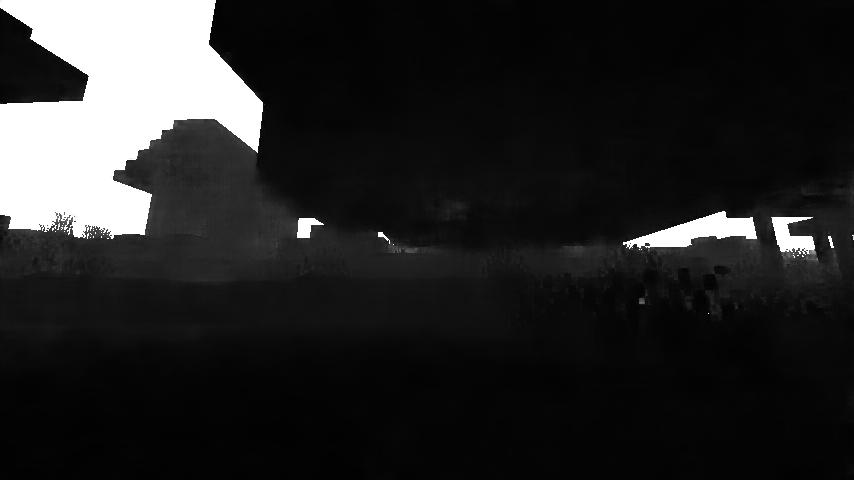

### D4MC prediction vs DepthAnything prediction



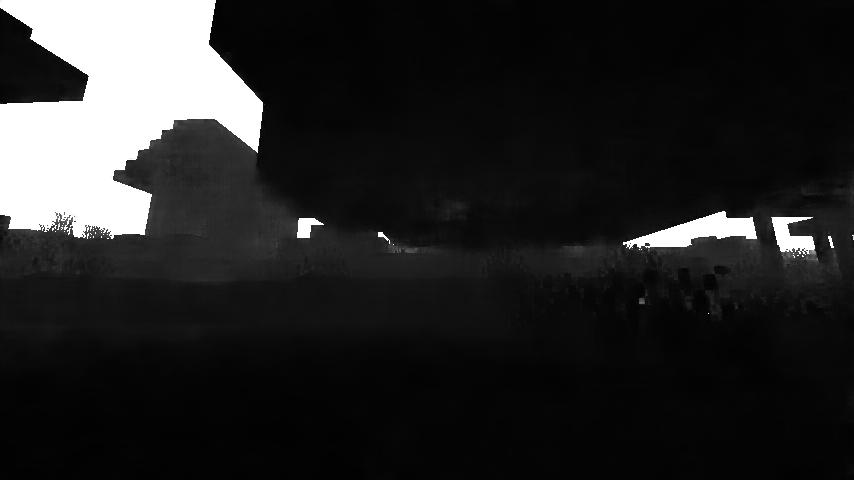
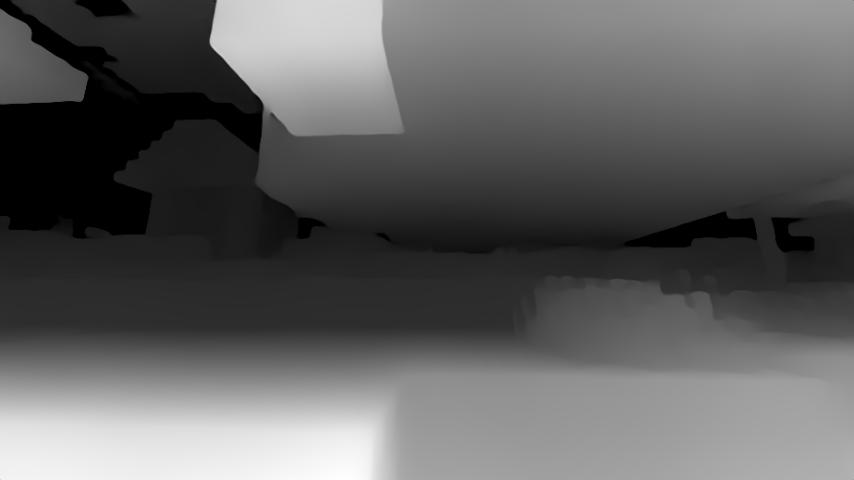

In [85]:
do_comp(model_D4MC, model_DepthAnything, img_nr=6147)